# Day 08. Exercise 01
# Binary classifier. SVM. Decision tree

## 0. Imports

In [169]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt, pyplot
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree

## 1. Preprocessing and logreg visualization

Read the file `am_pm.csv` to a dataframe from the previous exercise.

1. Draw a plot where the x-axis is `am`, the y-axis is `pm`, dots are the days, color depends on the target.
2. Add the decision boundary of logistic regression to the plot.
3. Draw the same plot (with the boundary), but the color should depend this time on the predictions.

Now it should be clear for you how the logistic regression works.

In [170]:
df = pd.read_csv('../data/am_pm.csv')
df

,date,am,pm,target,predict
0,2020-04-17,21,2,working_day,weekend
1,2020-04-18,1,68,weekend,working_day
2,2020-04-19,18,15,weekend,working_day
3,2020-04-20,2,23,working_day,working_day
4,2020-04-21,0,25,working_day,working_day
5,2020-04-22,0,28,working_day,working_day
6,2020-04-23,10,33,working_day,working_day
7,2020-04-24,2,14,working_day,working_day
8,2020-04-25,30,74,weekend,working_day
9,2020-04-26,28,233,weekend,working_day


In [171]:
X = df[['am', 'pm']]
X

,am,pm
0,21,2
1,1,68
2,18,15
3,2,23
4,0,25
5,0,28
6,10,33
7,2,14
8,30,74
9,28,233


In [172]:
y = df['target']
y

0     working_day
1         weekend
2         weekend
3     working_day
4     working_day
5     working_day
6     working_day
7     working_day
8         weekend
9         weekend
10    working_day
11    working_day
12    working_day
13    working_day
14    working_day
15        weekend
16        weekend
17    working_day
18    working_day
19    working_day
20    working_day
21    working_day
22        weekend
23        weekend
24    working_day
25    working_day
26    working_day
27    working_day
28    working_day
29        weekend
30        weekend
31    working_day
32    working_day
33    working_day
34    working_day
Name: target, dtype: object

In [173]:
model = LogisticRegression(random_state=21, fit_intercept=False)
model.fit(X, y)

LogisticRegression(fit_intercept=False, random_state=21)

In [174]:
b = model.intercept_[0]
print(b)
print(model.coef_)
w1, w2 = model.coef_.T
print(w1, w2)
c = -b / w2
print(c)
m = -w1/w2
print(m)

0.0
[[-0.00038653  0.00298066]]
[-0.00038653] [0.00298066]
[-0.]
[0.12967831]


In [175]:
xmin, xmax = df['am'].min(), df['am'].max()
print(xmin, xmax)
ymin, ymax = df['pm'].min(), df['pm'].max()
print(ymin, ymax)

0 91
0 509


In [176]:
xd = np.array([xmin, xmax])
print(xd)

[ 0 91]


In [177]:
yd = m * xd + c
print(yd)

[ 0.         11.80072628]


<AxesSubplot: xlabel='am', ylabel='pm'>

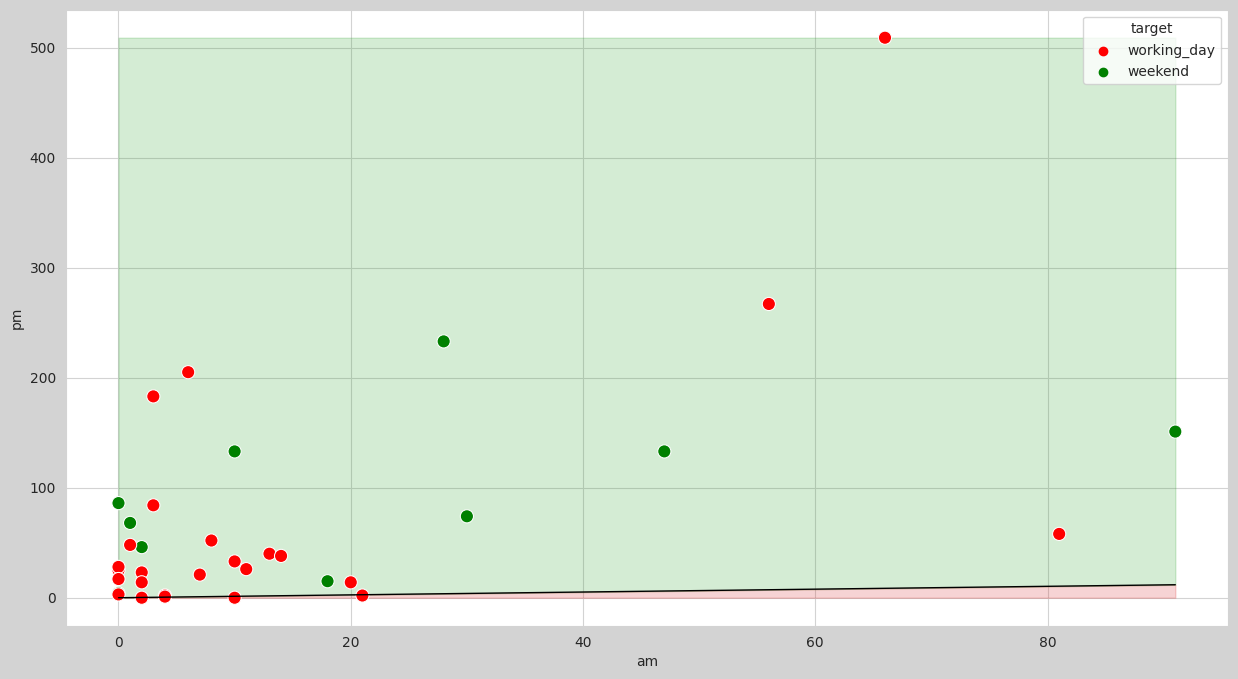

In [178]:
fig = plt.plot(xd, yd, 'k', lw=1)
plt.fill_between(xd, yd, ymin, color='tab:red', alpha=0.2)
plt.fill_between(xd, yd, ymax, color='tab:green', alpha=0.2)
plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]
plt.rcParams["figure.figsize"] = (15,8)
sns.scatterplot(data=df, x='am', y='pm', hue='target', s=90, palette=['red','green'])

<AxesSubplot: xlabel='am', ylabel='pm'>

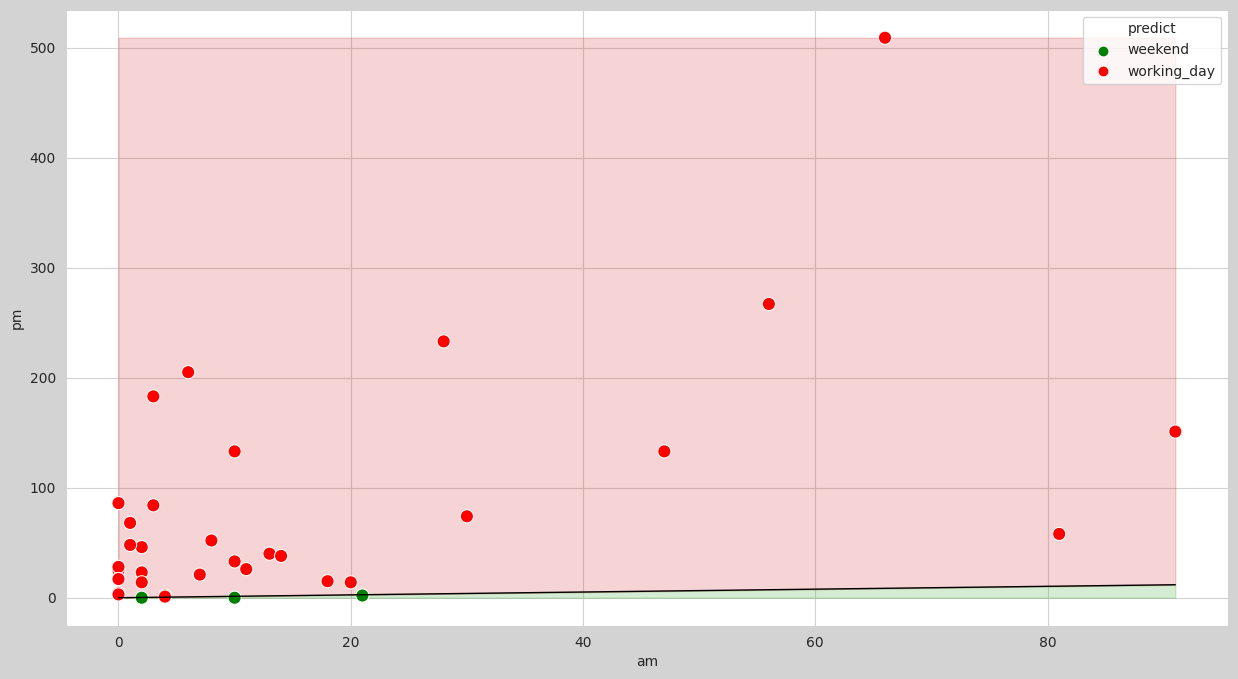

In [179]:
fig = plt.plot(xd, yd, 'k', lw=1)
plt.fill_between(xd, yd, ymin, color='tab:green', alpha=0.2)
plt.fill_between(xd, yd, ymax, color='tab:red', alpha=0.2)
plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]
plt.rcParams["figure.figsize"] = (15,8)
sns.scatterplot(data=df, x='am', y='pm', hue='predict', s=90, palette=['green', 'red'])

## 2. Standardizing and logreg

Linear models can be sensitive to the scale of your variables. You make it easier for them to find the optimal solution when you scale your features.

1. Apply `StandardScaler` to `X` and train logistic regression again with the same parameters.
2. Calculate `accuracy` for the new model. Did it get better than a naive classifier with the most popular class?
3. Draw the plots that were described above but for the new model.

In [180]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
X_scaled

array([[ 0.20069005, -0.71990365],
       [-0.65591383, -0.07182203],
       [ 0.07219947, -0.59225121],
       [-0.61308363, -0.51369586],
       [-0.69874402, -0.49405703],
       [-0.69874402, -0.46459877],
       [-0.27044208, -0.41550168],
       [-0.61308363, -0.60207063],
       [ 0.5861618 , -0.01290552],
       [ 0.50050141,  1.54838202],
       [-0.52742324, -0.71990365],
       [-0.52742324, -0.72972307],
       [-0.69874402, -0.57261237],
       [-0.1419515 , -0.34676575],
       [-0.35610247, -0.22893273],
       [ 3.19880362,  0.7431897 ],
       [ 1.31427509,  0.56644017],
       [-0.22761189, -0.48423761],
       [ 2.77050168, -0.17001622],
       [-0.61308363, -0.73954249],
       [-0.09912131, -0.36640459],
       [-0.57025344,  0.08528866],
       [-0.69874402,  0.1049275 ],
       [-0.27044208,  0.56644017],
       [-0.57025344,  1.05741109],
       [ 1.69974683,  1.88224224],
       [-0.44176286,  1.2734383 ],
       [ 2.12804877,  4.25854152],
       [-0.27044208,

In [181]:
model_scaled = LogisticRegression(random_state=21, fit_intercept=False)
model_scaled.fit(X_scaled, y)
y_predict = model_scaled.predict(X_scaled)
df[['am', 'pm']] = pd.DataFrame(X_scaled, columns=['am', 'pm'])
df['scaled_predict'] = y_predict
df

,date,am,pm,target,predict,scaled_predict
0,2020-04-17,0.200690,-0.719904,working_day,weekend,working_day
1,2020-04-18,-0.655914,-0.071822,weekend,working_day,working_day
2,2020-04-19,0.072199,-0.592251,weekend,working_day,working_day
3,2020-04-20,-0.613084,-0.513696,working_day,working_day,working_day
4,2020-04-21,-0.698744,-0.494057,working_day,working_day,working_day
5,2020-04-22,-0.698744,-0.464599,working_day,working_day,working_day
6,2020-04-23,-0.270442,-0.415502,working_day,working_day,working_day
7,2020-04-24,-0.613084,-0.602071,working_day,working_day,working_day
8,2020-04-25,0.586162,-0.012906,weekend,working_day,weekend
9,2020-04-26,0.500501,1.548382,weekend,working_day,weekend


In [182]:
accuracy = accuracy_score(y, y_predict)
accuracy

0.7428571428571429

Accuracy get better. Naive accuracy was — 0.7142857142857143

In [183]:
b = model_scaled.intercept_[0]
w1, w2 = model_scaled.coef_.T
c = -b / w2
m = -w1/w2
print(b)
print(w1, w2)
print(c)
print(m)

0.0
[-0.25396542] [-0.07384233]
[0.]
[-3.43929315]


In [184]:
xmin, xmax = df['am'].min(), df['am'].max()
ymin, ymax = df['pm'].min(), df['pm'].max()
print(xmin, xmax)
print(ymin, ymax)

-0.6987440192155088 3.1988036186153064
-0.7395424885854023 4.258541515264728


In [185]:
xd = np.array([xmin, xmax])
yd = m * xd + c
print(xd)
print(yd)

[-0.69874402  3.19880362]
[  2.40318552 -11.00162337]


<AxesSubplot: xlabel='am', ylabel='pm'>

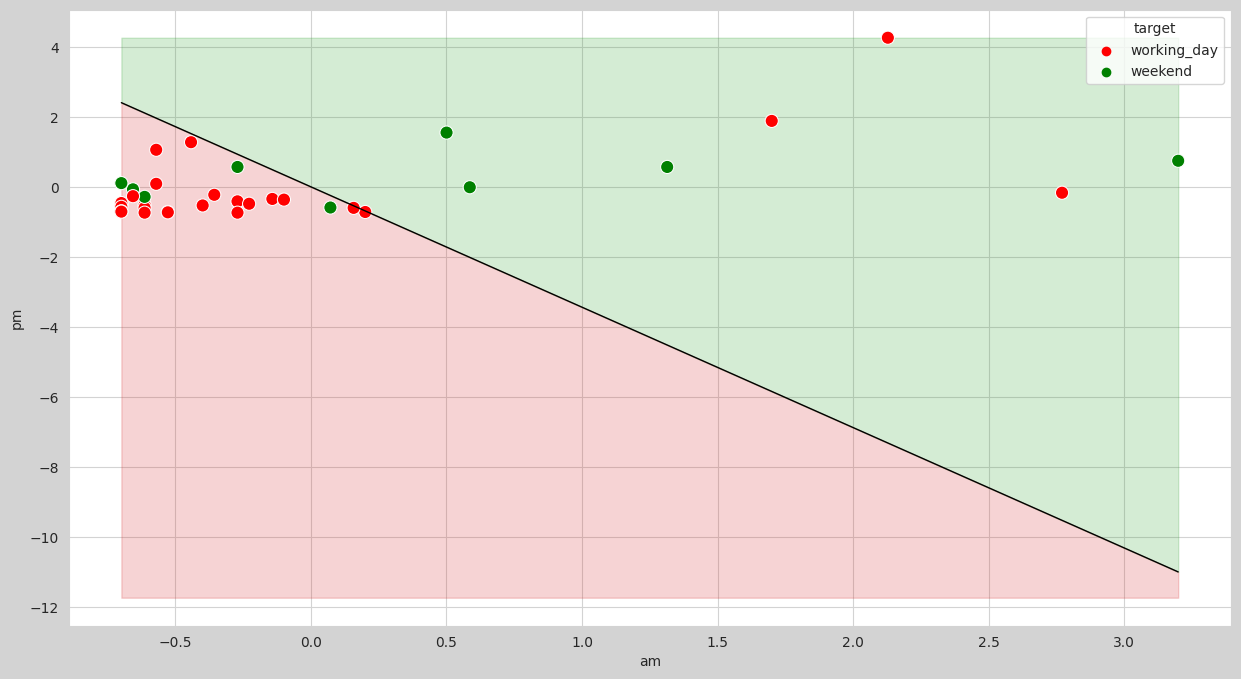

In [186]:
fig = plt.plot(xd, yd, 'k', lw=1)
plt.fill_between(xd, yd, ymin - 11, color='tab:red', alpha=0.2)
plt.fill_between(xd, yd, ymax, color='tab:green', alpha=0.2)
plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]
plt.rcParams["figure.figsize"] = (15,8)
sns.scatterplot(data=df, x='am', y='pm', hue='target', s=90, palette=['red', 'green'])

<AxesSubplot: xlabel='am', ylabel='pm'>

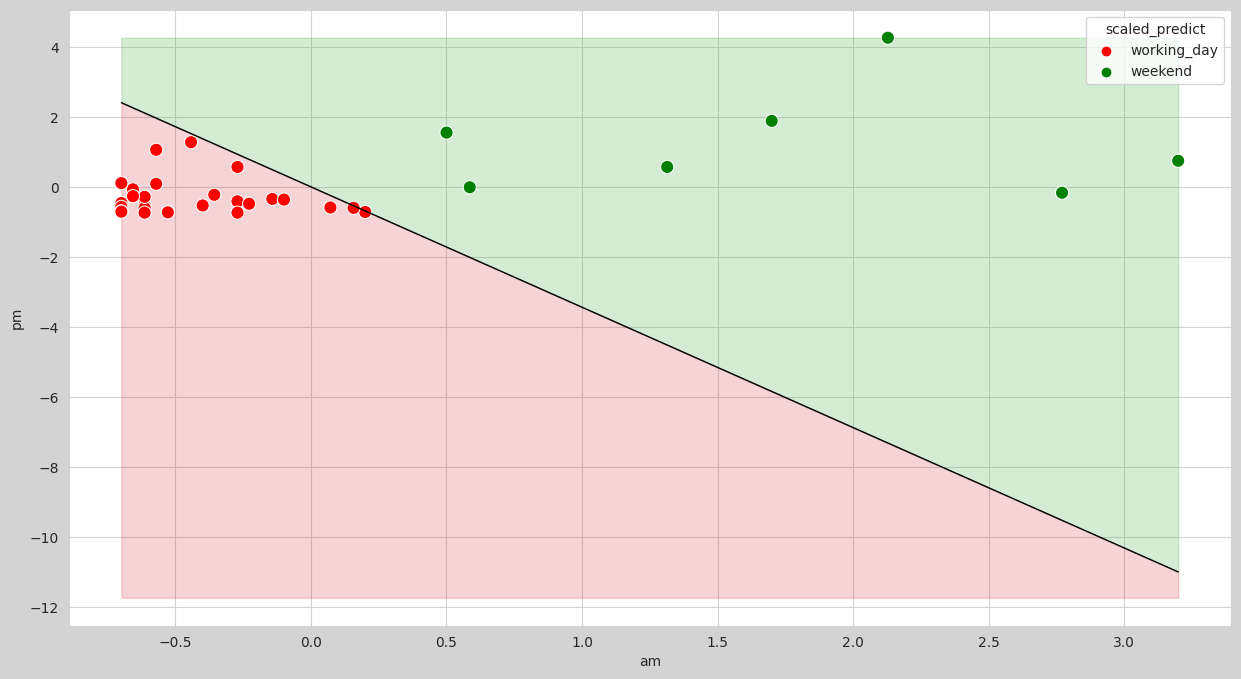

In [187]:
fig = plt.plot(xd, yd, 'k', lw=1)
plt.fill_between(xd, yd, ymin - 11, color='tab:red', alpha=0.2)
plt.fill_between(xd, yd, ymax, color='tab:green', alpha=0.2)
plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]
plt.rcParams["figure.figsize"] = (15,8)
sns.scatterplot(data=df, x='am', y='pm', hue='scaled_predict', s=90, palette=['red', 'green'])

## 3. SVM

1. Apply `SVC` model to the scaled dataframe using parameters `probability=True`, `random_state=21`.
2. Calculate `accuracy`.
3. Try different kernels, find the best in terms of accuracy.
4. Draw both plots again with the decisions boundary to see how this algorithm works.

In [188]:
kernel = ["linear", "poly", "rbf", "sigmoid"]
for k in kernel:
    data = SVC(kernel=k, probability=True, random_state=21)
    data.fit(X_scaled, y)
    pred = data.predict(X_scaled)
    accuracy = accuracy_score(y, pred)
    print(k, ': ', accuracy)

linear :  0.7142857142857143
poly :  0.7428571428571429
rbf :  0.7428571428571429
sigmoid :  0.6857142857142857


In [189]:
svc_class = SVC(kernel='rbf', probability=True, random_state=21)
svc_class.fit(X_scaled, y)
y_svc = svc_class.predict(X_scaled)
df['svc_rbf'] = y_svc
df

,date,am,pm,target,predict,scaled_predict,svc_rbf
0,2020-04-17,0.200690,-0.719904,working_day,weekend,working_day,working_day
1,2020-04-18,-0.655914,-0.071822,weekend,working_day,working_day,working_day
2,2020-04-19,0.072199,-0.592251,weekend,working_day,working_day,working_day
3,2020-04-20,-0.613084,-0.513696,working_day,working_day,working_day,working_day
4,2020-04-21,-0.698744,-0.494057,working_day,working_day,working_day,working_day
5,2020-04-22,-0.698744,-0.464599,working_day,working_day,working_day,working_day
6,2020-04-23,-0.270442,-0.415502,working_day,working_day,working_day,working_day
7,2020-04-24,-0.613084,-0.602071,working_day,working_day,working_day,working_day
8,2020-04-25,0.586162,-0.012906,weekend,working_day,weekend,working_day
9,2020-04-26,0.500501,1.548382,weekend,working_day,weekend,working_day


<AxesSubplot: xlabel='am', ylabel='pm'>

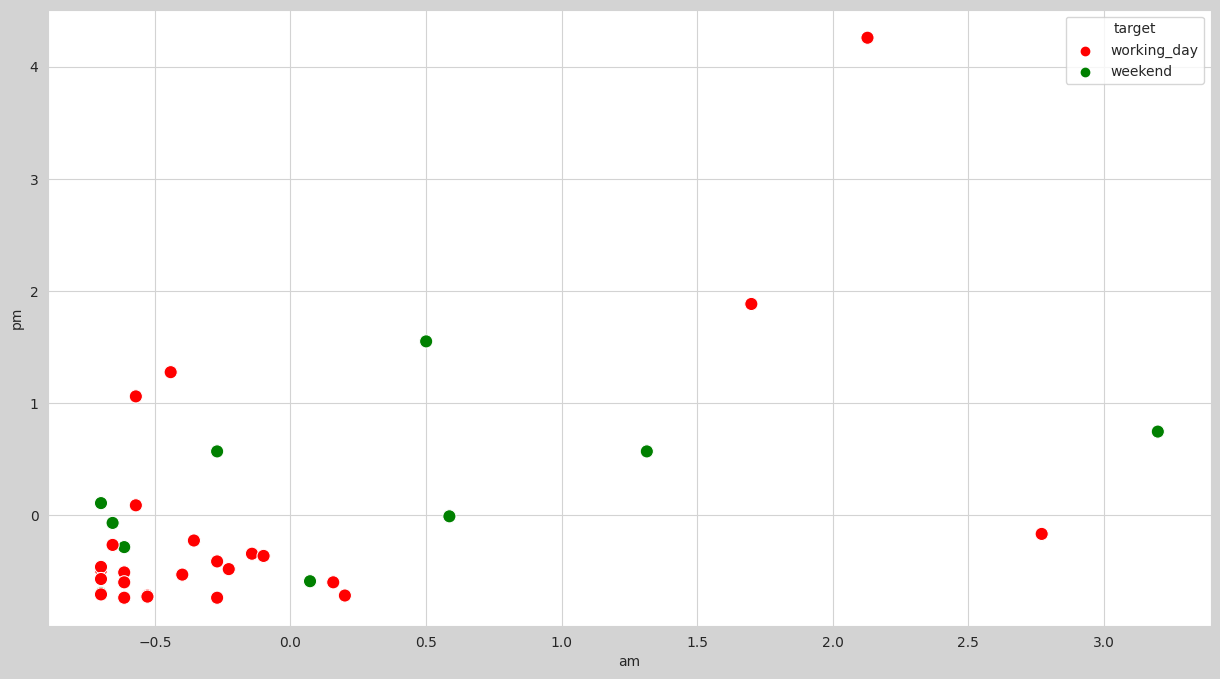

In [190]:
sns.scatterplot(data=df, x='am', y='pm', hue='target', s=90, palette=['red','green'])

<AxesSubplot: xlabel='am', ylabel='pm'>

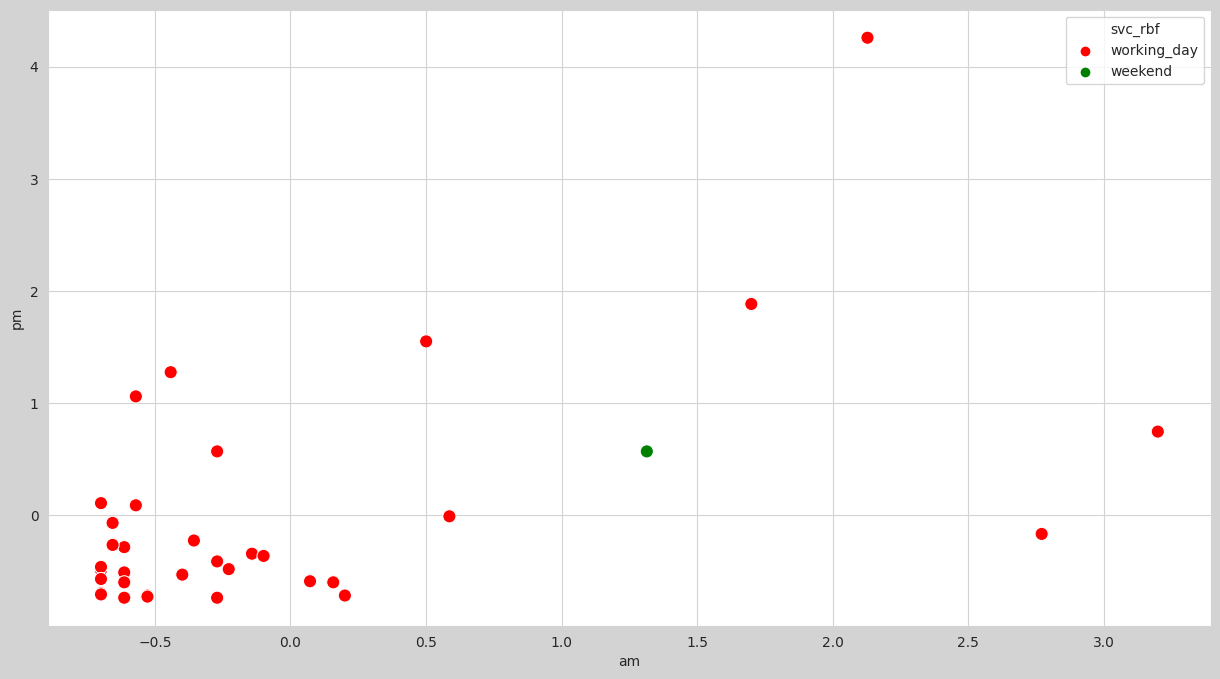

In [191]:
sns.scatterplot(data=df, x='am', y='pm', hue='svc_rbf', s=90, palette=['red','green'])

## 4. Decision tree

1. Apply `DecisionTreeClassifier` to the scaled dataframe using parameters `max_depth=4`, `random_state=42`.
2. Calculate accuracy.
3. Try different values of `max_depth`.
4. Draw both plots again with the decisions boundary to see how this algorithm works.
5. Using method `.plot_tree()` visualize the decision tree itself. It is another way of thinking about how the algorithm works.
6. How many leaves in the visualized tree label days as working days? Put your answer in the markdown cell in the end of the section.

In [192]:
des_tree = DecisionTreeClassifier(max_depth=4, random_state=42)
des_tree.fit(X_scaled, y)
y_des_pred = des_tree.predict(X_scaled)
df['tree'] = y_des_pred
df

,date,am,pm,target,predict,scaled_predict,svc_rbf,tree
0,2020-04-17,0.200690,-0.719904,working_day,weekend,working_day,working_day,working_day
1,2020-04-18,-0.655914,-0.071822,weekend,working_day,working_day,working_day,weekend
2,2020-04-19,0.072199,-0.592251,weekend,working_day,working_day,working_day,working_day
3,2020-04-20,-0.613084,-0.513696,working_day,working_day,working_day,working_day,working_day
4,2020-04-21,-0.698744,-0.494057,working_day,working_day,working_day,working_day,working_day
5,2020-04-22,-0.698744,-0.464599,working_day,working_day,working_day,working_day,working_day
6,2020-04-23,-0.270442,-0.415502,working_day,working_day,working_day,working_day,working_day
7,2020-04-24,-0.613084,-0.602071,working_day,working_day,working_day,working_day,working_day
8,2020-04-25,0.586162,-0.012906,weekend,working_day,weekend,working_day,weekend
9,2020-04-26,0.500501,1.548382,weekend,working_day,weekend,working_day,weekend


In [193]:
accuracy = accuracy_score(y, y_des_pred)
accuracy

0.9428571428571428

<AxesSubplot: xlabel='am', ylabel='pm'>

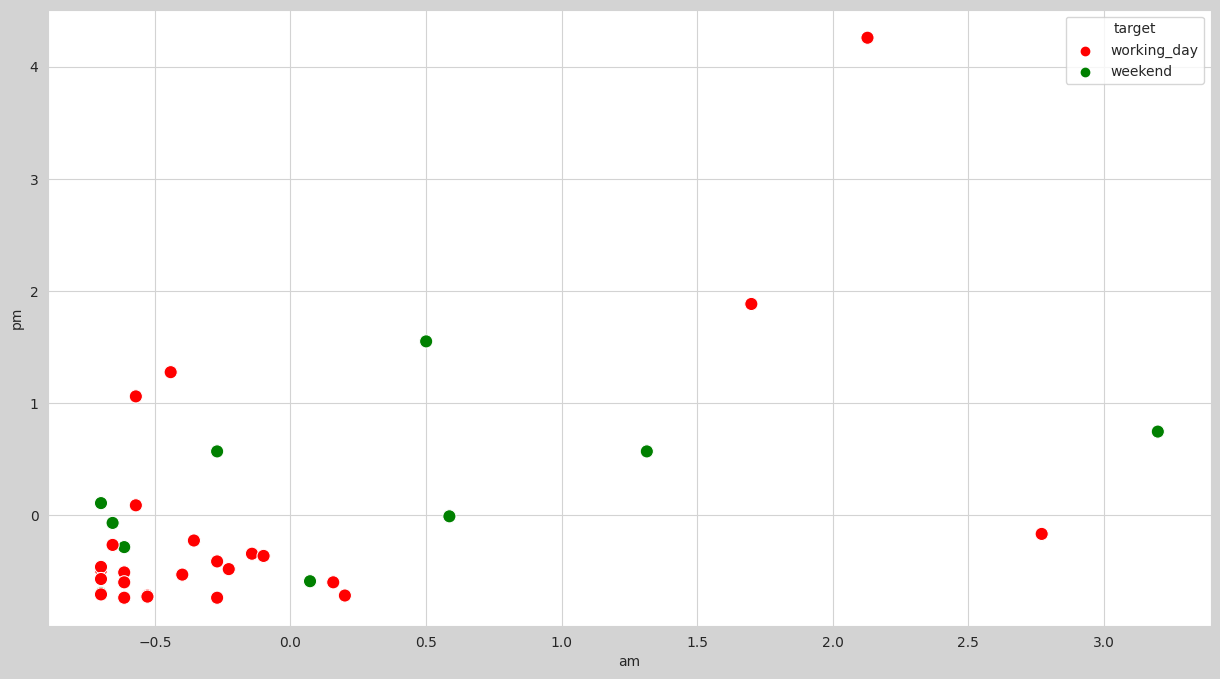

In [194]:
sns.scatterplot(data=df, x='am', y='pm', hue='target', s=90, palette=['red','green'])

<AxesSubplot: xlabel='am', ylabel='pm'>

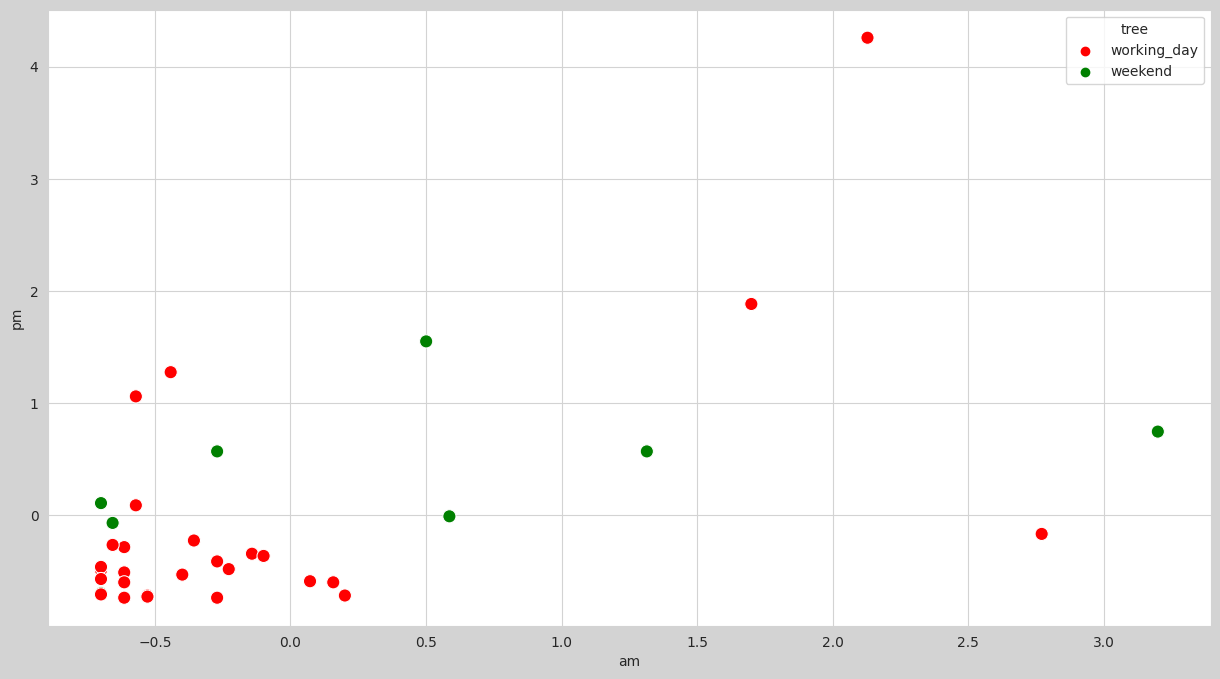

In [195]:
sns.scatterplot(data=df, x='am', y='pm', hue='tree', s=90, palette=['red','green'])

[Text(472.265625, 554.4, 'X[1] <= -0.121\ngini = 0.408\nsamples = 35\nvalue = [10, 25]'),
 Text(145.3125, 431.2, 'X[1] <= -0.705\ngini = 0.227\nsamples = 23\nvalue = [3, 20]'),
 Text(72.65625, 308.0, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(217.96875, 308.0, 'X[1] <= -0.651\ngini = 0.291\nsamples = 17\nvalue = [3, 14]'),
 Text(145.3125, 184.8, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(290.625, 184.8, 'X[0] <= -0.013\ngini = 0.219\nsamples = 16\nvalue = [2, 14]'),
 Text(217.96875, 61.60000000000002, 'gini = 0.142\nsamples = 13\nvalue = [1, 12]'),
 Text(363.28125, 61.60000000000002, 'gini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(799.21875, 431.2, 'X[1] <= 0.9\ngini = 0.486\nsamples = 12\nvalue = [7, 5]'),
 Text(653.90625, 308.0, 'X[0] <= -0.42\ngini = 0.245\nsamples = 7\nvalue = [6, 1]'),
 Text(581.25, 184.8, 'X[0] <= -0.613\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(508.59375, 61.60000000000002, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(653.90625, 

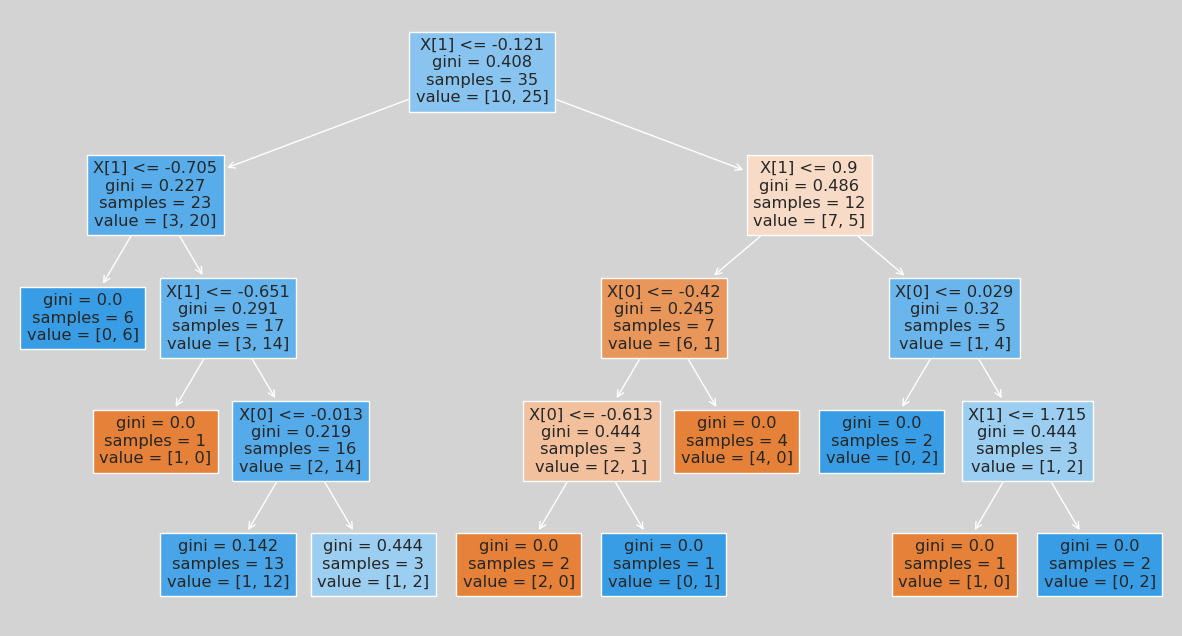

In [196]:
plt.figure(figsize=(15, 8))
plt.rcParams['figure.facecolor'] = 'grey'
plot_tree(des_tree, filled=True)